# Air Pollution Analysis

## Installing the necessary libraries

In [2]:
# !pip install py-openaq
# !pip install folium
# !pip install shapely
# !pip install geopandas

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [4]:
warnings.simplefilter('ignore')

%matplotlib inline

#     # Set major seaborn asthetics
# sns.set("notebook", style='ticks', font_scale=1.0)

#     # Increase the quality of inline plots
# mpl.rcParams['figure.dpi']= 500

# print ("pandas v{}".format(pd.__version__))
# print ("matplotlib v{}".format(mpl.__version__))
# print ("seaborn v{}".format(sns.__version__))
# print ("openaq v{}".format(openaq.__version__))

## Importing data on Cities

In [5]:
import openaq

api = openaq.OpenAQ()

status, resp = api.cities()

In [6]:
# Importing data for the US
us = api.latest(country = 'US', df=True)

In [7]:
# Printing out the first five rows.
us.head(2)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit
lastUpdated,,,,,,,,,
2019-12-06 20:00:00+00:00,pm25,5.800,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds
2021-11-30 19:00:00+00:00,o3,0.041,ppm,AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds


Data Management

In [8]:
# Finding more about the number of columns and rows
print('The dataset has ', us.shape[1], 'columns and ', us.shape[0], 'rows.')

The dataset has  9 columns and  252 rows.


In [9]:
# Finding out about the datatypes of our dataset
us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-06 20:00:00+00:00 to 2021-11-30 19:00:00+00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parameter              252 non-null    object 
 1   value                  252 non-null    float64
 2   unit                   252 non-null    object 
 3   sourceName             252 non-null    object 
 4   country                252 non-null    object 
 5   city                   252 non-null    object 
 6   location               252 non-null    object 
 7   averagingPeriod.value  252 non-null    int64  
 8   averagingPeriod.unit   252 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 19.7+ KB


In [10]:
# Dropping the missing values in the averagingPeriod.value column to have more consistent data
us = us.dropna(subset = ['averagingPeriod.value'])

In [11]:
# Making the index a column for more analysis
us['date and time'] = us.index

In [12]:
# Splitting the date and time into two separate columns
us['time'],us['date']= us['date and time'].apply(lambda x:x.time()), us['date and time'].apply(lambda x:x.date())
us.head(2)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,date and time,time,date
lastUpdated,,,,,,,,,,,,
2019-12-06 20:00:00+00:00,pm25,5.800,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds,2019-12-06 20:00:00+00:00,20:00:00,2019-12-06
2021-11-30 19:00:00+00:00,o3,0.041,ppm,AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds,2021-11-30 19:00:00+00:00,19:00:00,2021-11-30


In [13]:
# Dropping the date and time column after splitting
us = us.drop(['date and time'],axis=1)

In [14]:
# Separating the date column into year, month and day
us['year'] = pd.DatetimeIndex(us['date']).year
us['month'] = pd.DatetimeIndex(us['date']).month
us['day'] = pd.DatetimeIndex(us['date']).day 

In [15]:
# Dropping the date column
us = us.drop(['date'],axis=1)
us.head(1)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,time,year,month,day
lastUpdated,,,,,,,,,,,,,
2019-12-06 20:00:00+00:00,pm25,5.8,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds,20:00:00,2019,12,6


## Data Analysis

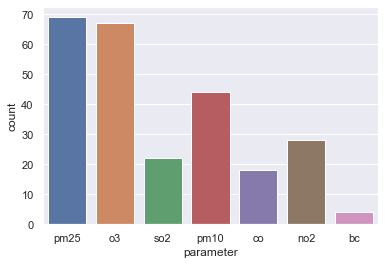

In [16]:
# Visualizing the highest number of air pollutants in the US.
sns.set(style="darkgrid")
ax = sns.countplot(x="parameter", data=us)

PM2.5 was the leading form of air pollutant in the US followed by o3 and PM10. BC was the least form of air pollutant in the US.

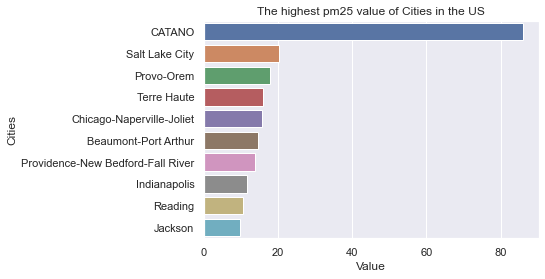

<Figure size 432x288 with 0 Axes>

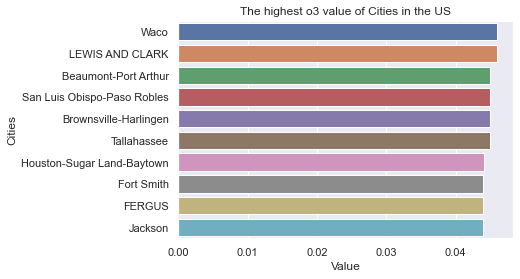

<Figure size 432x288 with 0 Axes>

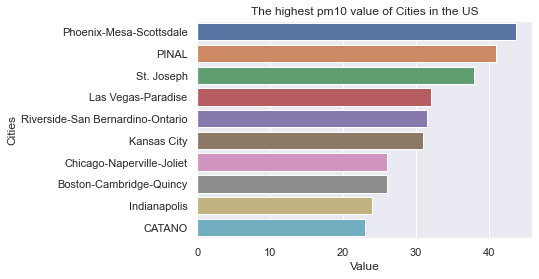

<Figure size 432x288 with 0 Axes>

In [17]:
# Ranking of the average values of the three most serious air pollutants in each city
us_1 = us.groupby(['city', 'parameter'],as_index=False).mean().sort_values(by='value',ascending=False) 


# Finding out the cities with the highest PM2.5 air pollution value.
us_pm25 = us_1.loc[us_1['parameter'].isin(['pm25'])].sort_values(by='value',ascending=False) 

# Finding out the cities with the highest o3 air pollution value.
us_o3 = us_1.loc[us_1['parameter'].isin(['o3'])].sort_values(by='value',ascending=False) 


# Finding out the cities with the highest PM10 air pollution value.
us_pm10 = us_1.loc[us_1['parameter'].isin(['pm10'])].sort_values(by='value',ascending=False) 


#Plotting the graphs using the seaborn barplot (pm2.5)
sns.barplot(x = us_pm25['value'].head(10), y = us_pm25['city'].head(10), data=us_1)
plt.xlabel('Value')
plt.ylabel('Cities')
plt.title('The highest pm25 value of Cities in the US')
plt.figure(figsize=(6,4))
plt.show()

#Plotting the graphs using the seaborn barplot (o3)
sns.barplot(x = us_o3['value'].head(10), y = us_o3['city'].head(10), data=us_1)
plt.xlabel('Value')
plt.ylabel('Cities')
plt.title('The highest o3 value of Cities in the US')
plt.figure(figsize=(6,4))
plt.show()

#Plotting the graphs using the seaborn barplot (pm10)
sns.barplot(x = us_pm10['value'].head(10), y = us_pm10['city'].head(10), data=us_1)
plt.xlabel('Value')
plt.ylabel('Cities')
plt.title('The highest pm10 value of Cities in the US')
plt.figure(figsize=(6,4))
plt.show()


The city with the highest PM25 value is:
*   CATANO
*   Santa Cruz-Watsonville
*   Salt Lake City


The city with the highest o3 value is:
*   Vero Beach
*   San Luis Obispo-Paso Robles
*   Tallahassee


The city with the highest PM10 value is:
*   Las Vegas-Paradise
*   PINAL
*   Kansas City

In [ ]:
# #Finding out the cities with the highest air pollution value.
# us_2 = us.groupby('value').mean()
# us_2 = us_2.reset_index(inplace=True)
# #Plotting the graphs using the seaborn barplot
# sns.barplot(x = us['value'].head(10), y = us['city'].head(10), data=us_2)
# plt.xlabel('Value')
# plt.ylabel('Cities')
# plt.title('The highest air pollution value of Cities in the US')
# plt.figure(figsize=(12,8))
# plt.show()

# The locations with the highest air pollution value are
# *   Ogden Dunes
# *   Parkway East
# *   South Bend


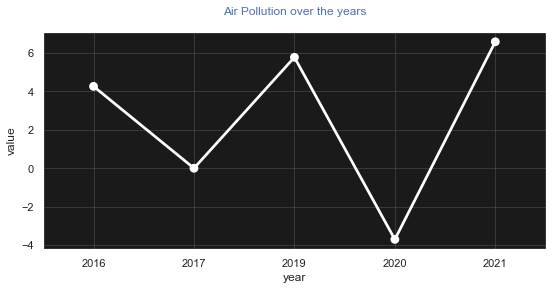

In [18]:
#Finding out the general trend of air pollution over the years.
values = us.groupby('year')['value'].mean().reset_index()
# Changing the datatype of the year column to int
values.year = values.year.astype(int) 
# Setting the figure size of the plot to 19 by 7
plt.figure(figsize=(9,4))
# Plotting a pointplot to show the trend of average price across the years
ax = sns.pointplot(values.year,values.value,color="w") 
# setting the background color to black, for contrast
ax.set_facecolor("k") 
plt.grid(True,color="grey",alpha=.3)
plt.title("Air Pollution over the years",color='b', y = 1.05) 
plt.show()

There has been a dynamic shift in air pollution value over the years with year 2017 and 2020 recording the lowest values. Though there is a general increase in air pollution over the years.

## Geo location mapping

In [19]:
# Copying the data in a different data frame
df = us.copy()

In [20]:
# Installing the necessary library
# !pip install opencage

In [21]:
from opencage.geocoder import OpenCageGeocode

# get api key from:  https://opencagedata.com
key = 'ee91949bafc44bf1a93652d30700bf66'
	
geocoder = OpenCageGeocode(key)

In [22]:
# Creating a for loop to map the geo locations
list_lat = []   # create empty lists

list_long = []


	
for index, row in df.iterrows(): # iterate over rows in dataframe

    City = row['city']       
    query = str(City)

    # Forward geocoding
    results = geocoder.geocode(query)    
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

	
# create new columns from lists    

df['lat'] = list_lat   

df['lon'] = list_long

In [23]:
# Viewing our new columns.
df.head(2)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,time,year,month,day,lat,lon
lastUpdated,,,,,,,,,,,,,,,
2019-12-06 20:00:00+00:00,pm25,5.800,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds,20:00:00,2019,12,6,29.7355,-94.97743
2021-11-30 19:00:00+00:00,o3,0.041,ppm,AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600,seconds,19:00:00,2021,11,30,29.7355,-94.97743


In [24]:
import folium
from folium import plugins
from folium import Marker

%matplotlib inline

In [25]:
# ! pip install ipyleaflet
# from ipyleaflet import *
City = 'Chicago'      
query = str(City)

# Forward geocoding
results = geocoder.geocode(query)    
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']
print(lat,long)

41.8755616 -87.6244212


In [29]:
Center = [41.8755616, -87.6244212]
m = folium.Map(Center, zoom_start=9)
folium.Marker(Center,  popup='Timberline Lodge',icon=folium.Icon(color='red')).add_to(m)

# mark each station as a point
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=5, popup=row['city'],
                        color="cornflowerblue", stroke=False,opacity=20,
                        fill=True, fill_color="#3388ff",fill_opacity=20,
                       ).add_to(m)
    
# convert to (n, 2) nd-array format for heatmap
stationArr = df[['lat', 'lon']].values

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m.add_child(folium.LatLngPopup())

m

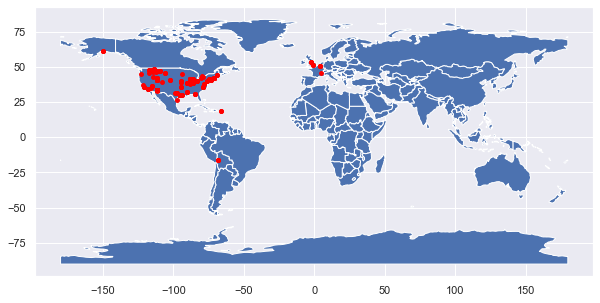

In [28]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);